In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# Эмпирическое распределение и подбор теоритического распределения

С помощью эмпирической функции распределения можно подобрать теоритическое распределение. Преимущество заключается в том, что нам не нужно определять с какой величиной мы имеем дело - дискретная или непрерывной. При увеличени размера выборки эмп.функция стремится к функции распределения случайной величины, породившей эту выборку. Поэтому эмп.функция позволяет приближенно восстановить функцию распределения.

эмпирическая функция распределения: $$Count(x)=\frac{1}{n}\Sigma_{x_i \leq x}1$$

In [2]:
def ecdf(values_array):

     #counts возвращает сколько раз встречалось значение
     x, counts = np.unique(values_array, return_counts=True) 
     cusum = np.cumsum(counts)
     y = cusum / cusum[-1] 
     
     return x, y 

## Подбор теоритической функции распределения с помощь эмпирической

Близость двух функций можно оценить с помощью разности (MSE). Чем меньше полученное значение, тем ближе наша эмпирическая функция распределения к теоретической. Само полученное значение сложно интерпретируется. Важно то, что можно сравнить результат для разных распределений.

$$MSE=\frac{1}{n}\Sigma_{i=1}^n(F_n(x_i)-F_X(x_i))^2$$

In [3]:
def mse(x, y, dist):
    Q = 0
    for i in range(len(x)):
        Q += (y[i] - dist.cdf(x[i])) ** 2
    return Q/len(x)

In [6]:
# создание выборки для примера
n_size = 1000
mu = 5 # среднее выборки

Lambda = 1 / mu
X = ss.expon(scale=1/Lambda)
X_vals = X.rvs(n_size)

# получение эмпирического распределения
x, y = ecdf(X_vals)

5.157985453014384

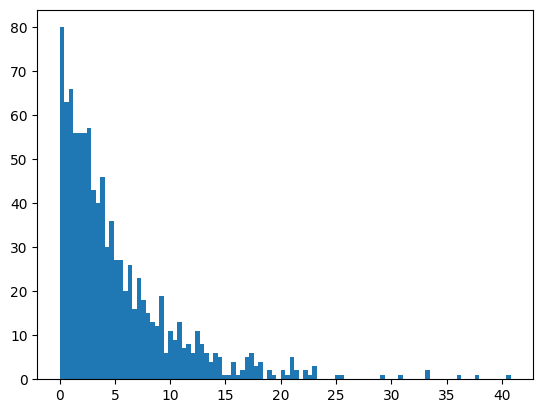

In [7]:
display(np.mean(X_vals))
plt.hist(X_vals,bins=100);

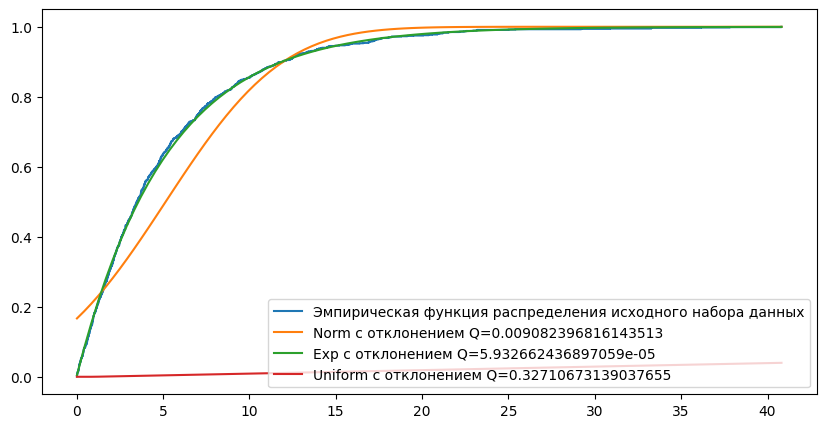

In [8]:
# Параметры равномерного распределения
a = 1
b = len(X_vals)

# Параметры нормального распределения
mu = np.mean(X_vals)
sigma = np.std(X_vals)

# Параметры экспоненциального распределения
Lambda = 1 / mu

points_number = 100
xCDF = np.linspace(min(X_vals), max(X_vals), points_number)

y1 = ss.norm(loc = mu, scale = sigma)
y2 = ss.expon(scale = 1/ Lambda)
y3 = ss.uniform(loc = a, scale = b - a)

yCDF1 = y1.cdf(xCDF)
yCDF2 = y2.cdf(xCDF)
yCDF3 = y3.cdf(xCDF)

plt.figure(figsize=(10,5))
plt.plot(x, y, drawstyle='steps-post')
plt.plot(xCDF, yCDF1)
plt.plot(xCDF, yCDF2)
plt.plot(xCDF, yCDF3)

plt.legend(["Эмпирическая функция распределения исходного набора данных",
            f"Norm с отклонением Q={mse(x, y, y1)}",
            f"Exp с отклонением Q={mse(x, y, y2)}",
            f"Uniform с отклонением Q={mse(x, y, y3)}"], loc='lower right')
plt.show()

При симулированном экспоненциальном распределении видно, что эмпирическая функция распределения полностью совпала с теоритической экспоненциальной. В реальных задачах получается далеко не так хорошо. Поэтому нам остается подобрать самое близкое распределения. <br>
В данном ноутбуке использовано всего три распределения, но можно добавлять другие и непреревные и дискретные.

TODO
- Добавить другие распределения
